In [143]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

In [144]:
import warnings
warnings.filterwarnings('ignore')

In [145]:
def genreate_stock_data(stock_name,period):
    company = yf.Ticker(stock_name)
    df = company.history(period=period)
    
    #Sepreate the dates of the stock for further use if required
    date = (df.reset_index())['Date']
    #-------------------------------------------------------------------------------------------------------------
    
    #Remove data object from the database
    df = (df.reset_index()).drop('Date',axis=1)
    #-------------------------------------------------------------------------------------------------------------
    
    #Create the current trend of the current stock
    t = []
    for i in range(len(df)):
        if(df['Open'].iloc[i]-df['Close'].iloc[i]>0):
            t.append("DOWN")
        else:
            t.append("UP")
            
    df['Trend']=t
    #-------------------------------------------------------------------------------------------------------------
    
    #Create the trend history of the stock
    th=[0]
    current_trend = df['Trend'].iloc[0]
    count = 0
    for i in range(1,len(df)):
        if(current_trend==df['Trend'].iloc[i]):
            count+=1
            th.append(count)
        else:
            count = 0
            th.append(count)
            current_trend = df['Trend'].iloc[i]
            
    df["Trend history"]=th
    #-------------------------------------------------------------------------------------------------------------
    
    #Create the comparison to the change since last peak
    p=[]
    v=[]
    if(df['Trend'].iloc[0]=="DOWN"):
        peak = df['Open'].iloc[0]
        valley = df['Close'].iloc[0]
    else:
        valley = df['Open'].iloc[0]
        peak = df['Close'].iloc[0]

    for i in range(0,len(df)):

        p.append(peak-df['Close'].iloc[i])
        v.append(valley-df['Close'].iloc[i])

        if peak<df['Close'].iloc[i]:
            peak = df['Close'].iloc[i]
        if valley>df['Close'].iloc[i]:
            valley = df['Close'].iloc[i]
            
    df['Change since last peak']=p
    df['Change since last drop']=v
    #-------------------------------------------------------------------------------------------------------------
    
    #Create the local change of daily stock
    c=[]
    cm=[]
    for i in range(0,len(df)):
        c.append(df['Open'].iloc[i]-df['Close'].iloc[i])
        cm.append(df['High'].iloc[i]-df['Low'].iloc[i])

    df['Local Change']=c
    df['Local range of stock price']=cm
    #-------------------------------------------------------------------------------------------------------------
    
    #Create dummy variable for the categorical variable
    df = pd.get_dummies(df,drop_first=True)
    #-------------------------------------------------------------------------------------------------------------
    
    #Create the label for the change from tommorow, the data that needs to be predicted
    next_day_change = df[1:]
    next_day_change = next_day_change['Trend_UP']
    #-------------------------------------------------------------------------------------------------------------
    
    #Add the created label to the database
    df.drop(index=df.index[-1],axis=0,inplace=True)
    #-------------------------------------------------------------------------------------------------------------
    
    #Break the data into features and labels
    X = df
    y = next_day_change
    #-------------------------------------------------------------------------------------------------------------
    
    return(date,X,y)

In [146]:
date,X,y=genreate_stock_data('MSFT','1mo')

In [147]:
def evaluate_stock_log(stock,duration):
    
    date, X, y = genreate_stock_data(stock,duration)
    
    train_rmse_errors = []
    test_rmse_errors = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    model = LogisticRegression()
    model.fit(X_train,y_train)
        
    cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()

In [148]:
def evaluate_stock_dt(stock,duration):
    
    date, X, y = genreate_stock_data(stock,duration)
    
    train_rmse_errors = []
    test_rmse_errors = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    
    plt.figure(figsize=(48,36))
    plot_tree(model,filled=True,feature_names=X.columns)
        
    cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()

In [149]:
def evaluate_stock_dt(stock,duration):
    
    date, X, y = genreate_stock_data(stock,duration)
    
    train_rmse_errors = []
    test_rmse_errors = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    
    plt.figure(figsize=(48,36))
    plot_tree(model,filled=True,feature_names=X.columns)
        
    cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()

In [150]:
def evaluate_stock_rf(stock,duration,iterations):
    
    date, X, y = genreate_stock_data(stock,duration)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    test_error = []

    for n in range(1,iterations):
        # Use n random trees
        model = RandomForestClassifier(n_estimators=n,max_features='auto')
        model.fit(X_train,y_train)
        test_preds = model.predict(X_test)
        test_error.append(1-accuracy_score(test_preds,y_test))
        
    plt.plot(range(1,iterations),test_error,label='Test Error')
    plt.legend()

In [ ]:
evaluate_stock_log('MSFT','5mo')

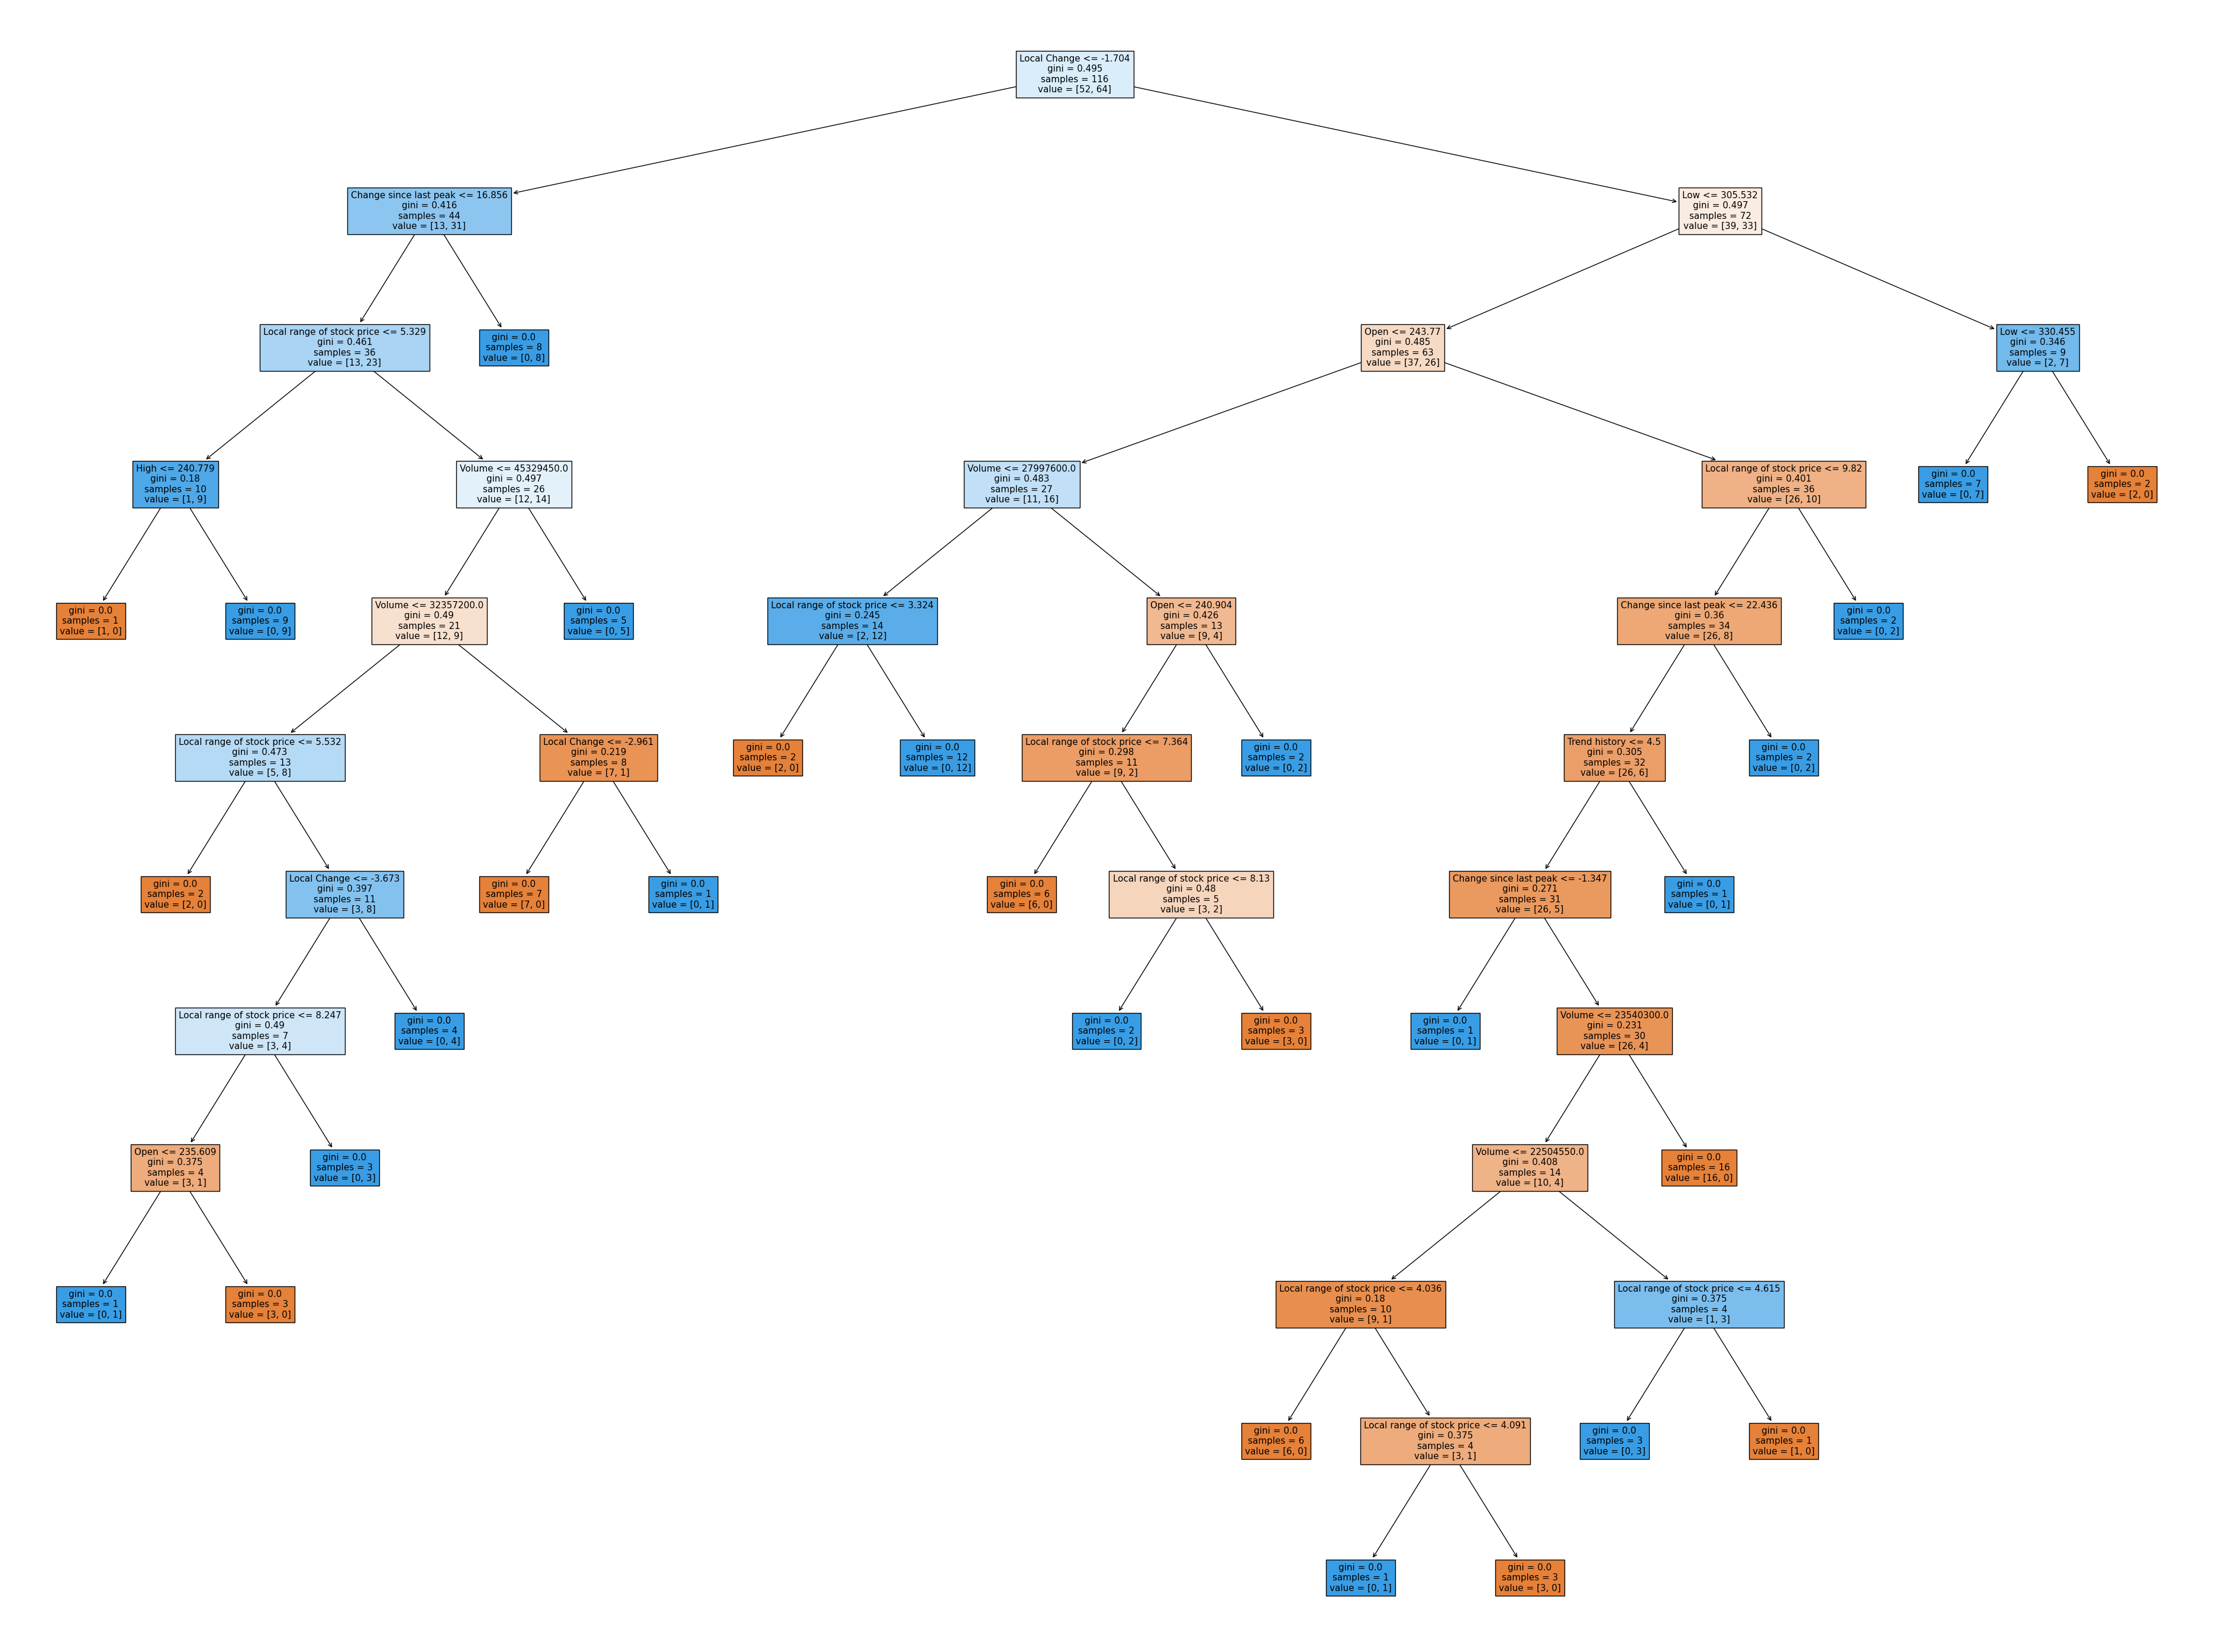

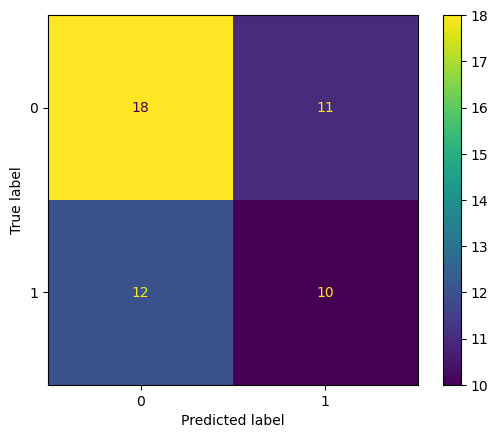

In [152]:
evaluate_stock_dt('MSFT','8mo')

In [154]:
evaluate_stock_rf('MSFT','8mo',1000)


KeyboardInterrupt

